In [112]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statistics import mean

train_airbnb_df = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin.csv")
train_airbnb_df_c = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin_cleaned.csv")
X_train = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/X_train.csv")
X_val = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/X_val.csv")
X_test = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/X_test.csv")

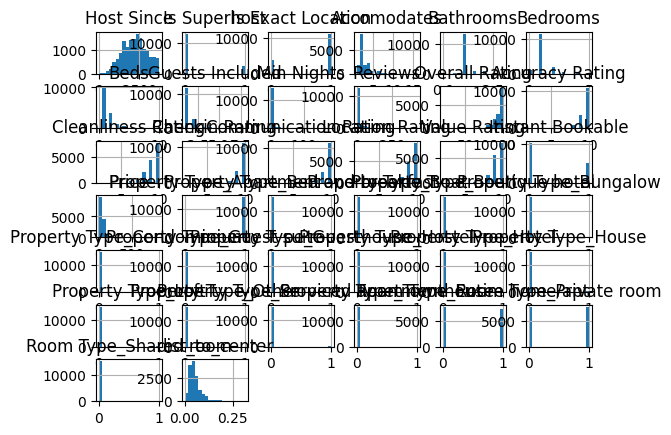

In [113]:
hist = train_airbnb_df_c.hist(bins=18)

### Which category to stratify

In [89]:
coeffs, cols = [], []
columns = list(train_airbnb_df_c.columns)
columns.remove('Business Travel Ready')
for col in columns:
    if col != 'Price':
        cols += [col]
        corr, _ = pearsonr(train_airbnb_df_c[col], train_airbnb_df_c["Price"])
        coeffs += [corr]
data = {}
for i in range(len(cols)):
    data[cols[i]] = coeffs[i]
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

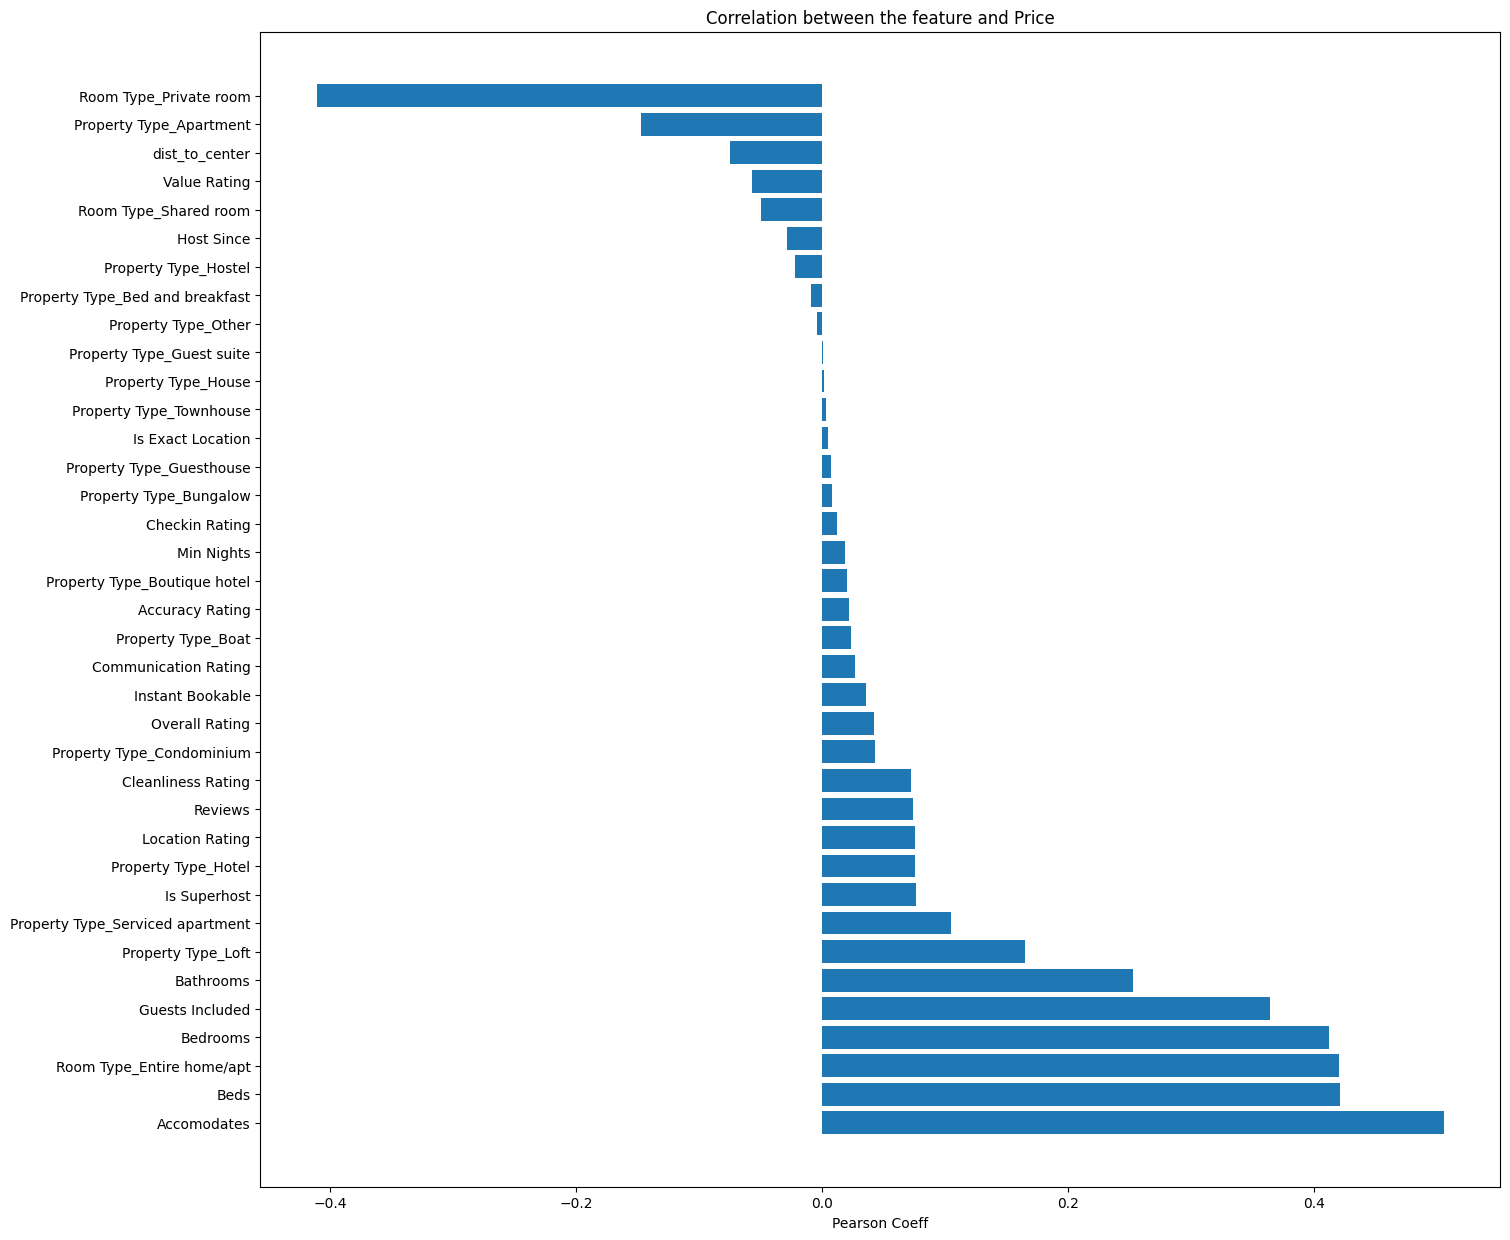

In [90]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 15)
performance = 100.0

cols = list(sorted_data.keys())
coeffs = list(sorted_data.values())
ax.barh(np.arange(len(cols)), coeffs, align='center')
ax.set_yticks(np.arange(len(cols)), labels=cols)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Pearson Coeff')
ax.set_title('Correlation between the feature and Price')

plt.show()

In [99]:
from sklearn.model_selection import train_test_split

train_airbnb_df_c['Accomodates'] = train_airbnb_df_c['Accomodates'].replace(16, np.NAN)
train_airbnb_df_c = train_airbnb_df_c.dropna(subset='Accomodates')
print(train_airbnb_df_c['Accomodates'].value_counts())

whole_data_train, data_test = train_test_split(
    train_airbnb_df_c,
    test_size=0.2,
    stratify=train_airbnb_df_c['Accomodates'],
    random_state=42, shuffle=True
)
data_train, data_val = train_test_split(
    whole_data_train,
    test_size=0.2,
    stratify=whole_data_train['Accomodates'],
    random_state=42, shuffle=True
)
print(data_test['Accomodates'].value_counts())
print(whole_data_train['Accomodates'].value_counts())
# print(data_val['Accomodates'].value_counts())

2.0     8323
4.0     2183
3.0     1846
1.0     1703
6.0      500
5.0      462
8.0       95
7.0       77
9.0       36
10.0      32
12.0      12
Name: Accomodates, dtype: int64
2.0     1665
4.0      437
3.0      369
1.0      341
6.0      100
5.0       93
8.0       19
7.0       15
9.0        7
10.0       6
12.0       2
Name: Accomodates, dtype: int64
2.0     6658
4.0     1746
3.0     1477
1.0     1362
6.0      400
5.0      369
8.0       76
7.0       62
9.0       29
10.0      26
12.0      10
Name: Accomodates, dtype: int64


### Box plot for features before scaling

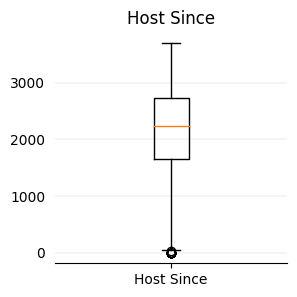

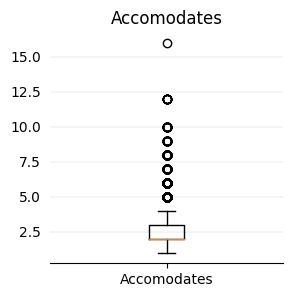

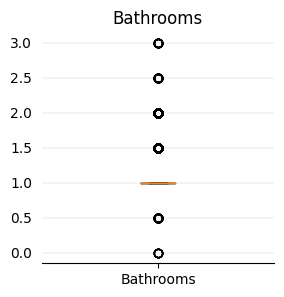

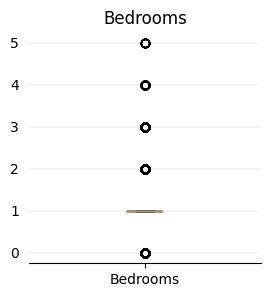

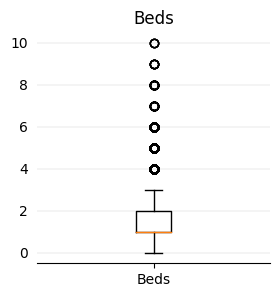

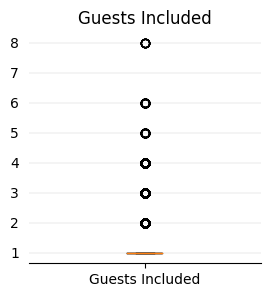

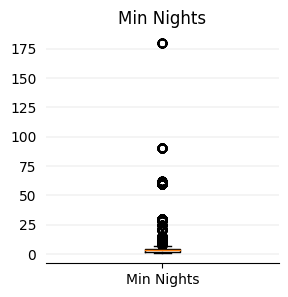

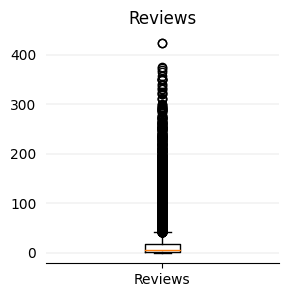

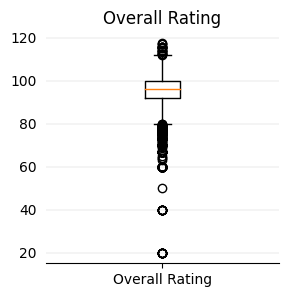

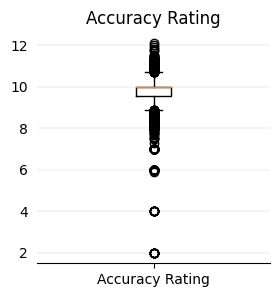

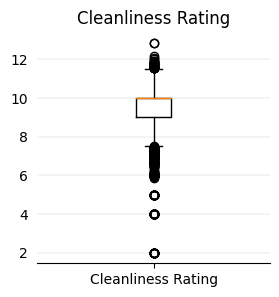

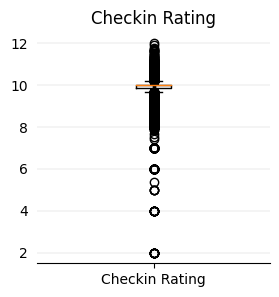

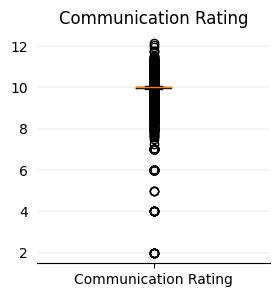

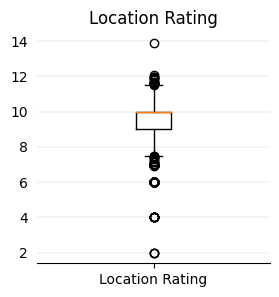

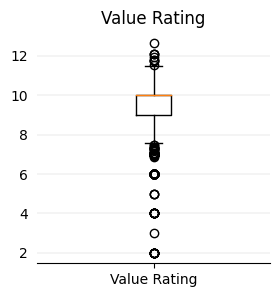

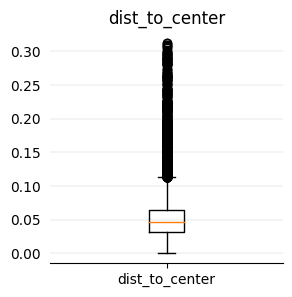

In [87]:
columns = [
    'Host Since',
    # 'Is Superhost',
    # 'Is Exact Location',
    'Accomodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Min Nights',
    'Reviews',
    'Overall Rating',
    'Accuracy Rating',
    'Cleanliness Rating',
    'Checkin Rating',
    'Communication Rating',
    'Location Rating',
    'Value Rating',
    # 'Instant Bookable',
    # 'Business Travel Ready',
    'dist_to_center'
]
for column in columns:
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(3, 3))
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')
    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    # Set plot title
    ax.set_title(column)
    ax.boxplot(train_airbnb_df_c[column].dropna().to_numpy(), labels=[column])
    # ax.set_ylim(0, 300)
    plt.show()

In [92]:
train_airbnb_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15270 entries, 0 to 15269
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Host Since                        15270 non-null  float64
 1   Is Superhost                      15270 non-null  float64
 2   Is Exact Location                 15270 non-null  float64
 3   Accomodates                       15270 non-null  float64
 4   Bathrooms                         15270 non-null  float64
 5   Bedrooms                          15270 non-null  float64
 6   Beds                              15270 non-null  float64
 7   Guests Included                   15270 non-null  float64
 8   Min Nights                        15270 non-null  float64
 9   Reviews                           15270 non-null  float64
 10  Overall Rating                    15270 non-null  float64
 11  Accuracy Rating                   15270 non-null  float64
 12  Clea